In [1]:
import nltk as nt
import pandas as pd

In [2]:
df = pd.read_csv('un-general-debates.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   session  7507 non-null   int64 
 1   year     7507 non-null   int64 
 2   country  7507 non-null   object
 3   text     7507 non-null   object
dtypes: int64(2), object(2)
memory usage: 234.7+ KB


In [4]:
df['length']=df['text'].str.len()

In [5]:
df.head()

,session,year,country,text,length
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...,19023
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ...",17396
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ...",30780
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...,17249
4,44,1989,ZWE,﻿I should like at the outset to express my del...,27779


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


In [7]:
df['country'].value_counts() 
df['country'].describe(include='0').T

count     7507
unique     199
top        ARG
freq        46
Name: country, dtype: object

In [8]:
df.isnull().sum()

session    0
year       0
country    0
text       0
length     0
dtype: int64

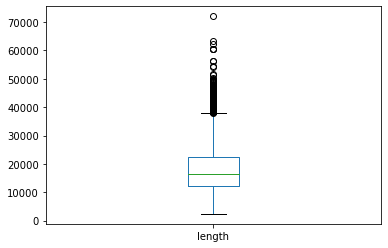

In [9]:
df['length'].plot(kind='box', x='length',y='count')

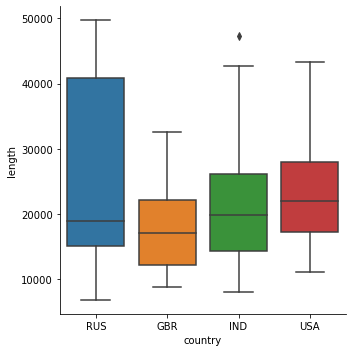

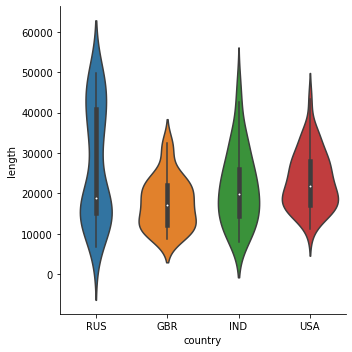

In [10]:
import seaborn as sns

where = df['country'].isin(['USA','GBR','IND','RUS'])

sns.catplot(data=df[where],x='country',y='length',kind='box')
sns.catplot(data=df[where],x='country',y='length',kind='violin')

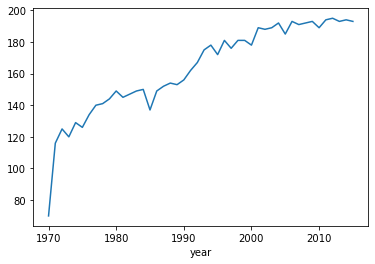

In [11]:
df.groupby('year').size().plot(kind='line')

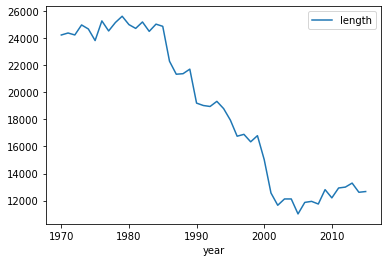

In [12]:
df.groupby('year').agg({'length':'mean'}).plot()  #tHIS TELLS THAT AS THE NUMBER OF COUNTRIES INCRESES THE SPEECH LENGHT IS DECREASING

In [13]:
from collections import Counter

MyString = "My Name is Akash. I am a C++ software developer and I have 4 yrs of experience"

c = Counter(MyString.split())

print(c)

Counter({'I': 2, 'My': 1, 'Name': 1, 'is': 1, 'Akash.': 1, 'am': 1, 'a': 1, 'C++': 1, 'software': 1, 'developer': 1, 'and': 1, 'have': 1, '4': 1, 'yrs': 1, 'of': 1, 'experience': 1})


In [14]:
MyString2 = "I studied C++ in College and has good experience in it"

c.update(MyString2.split())
print(c)

Counter({'I': 3, 'C++': 2, 'and': 2, 'experience': 2, 'in': 2, 'My': 1, 'Name': 1, 'is': 1, 'Akash.': 1, 'am': 1, 'a': 1, 'software': 1, 'developer': 1, 'have': 1, '4': 1, 'yrs': 1, 'of': 1, 'studied': 1, 'College': 1, 'has': 1, 'good': 1, 'it': 1})


In [15]:
def prepare_tokens(text):
    s = text.split()
    return s

In [16]:
df['tokens'] = df['text'].apply(prepare_tokens)

In [17]:
df

,session,year,country,text,length,tokens
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...,19023,"[﻿It, is, indeed, a, pleasure, for, me, and, t..."
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ...",17396,"[﻿, May, I, begin, by, congratulating, you., S..."
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ...",30780,"[﻿, Mr., President,, it, is, a, particular, pl..."
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...,17249,"[﻿, During, the, debate, at, the, fortieth, se..."
4,44,1989,ZWE,﻿I should like at the outset to express my del...,27779,"[﻿I, should, like, at, the, outset, to, expres..."
...,...,...,...,...,...,...
7502,56,2001,KAZ,﻿This session\nthat is taking place under extr...,9510,"[﻿This, session, that, is, taking, place, unde..."
7503,56,2001,LBR,﻿I am honoured to\nparticipate in this histori...,15573,"[﻿I, am, honoured, to, participate, in, this, ..."
7504,56,2001,BDI,﻿It\nis for me a signal honour to take the flo...,16767,"[﻿It, is, for, me, a, signal, honour, to, take..."
7505,56,2001,HUN,"﻿First, may I congratulate Mr. Han Seung-soo o...",11593,"[﻿First,, may, I, congratulate, Mr., Han, Seun..."


In [18]:
sw = set(nt.corpus.stopwords.words('english'))

def remove_sw(tokens):
    return [t for t in tokens if t not in sw]

In [19]:
df['text_sw_removal'] = df['tokens'].apply(remove_sw)

In [20]:
df

,session,year,country,text,length,tokens,text_sw_removal
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...,19023,"[﻿It, is, indeed, a, pleasure, for, me, and, t...","[﻿It, indeed, pleasure, members, delegation, e..."
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ...",17396,"[﻿, May, I, begin, by, congratulating, you., S...","[﻿, May, I, begin, congratulating, you., Sir,,..."
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ...",30780,"[﻿, Mr., President,, it, is, a, particular, pl...","[﻿, Mr., President,, particular, pleasure, me,..."
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...,17249,"[﻿, During, the, debate, at, the, fortieth, se...","[﻿, During, debate, fortieth, session, General..."
4,44,1989,ZWE,﻿I should like at the outset to express my del...,27779,"[﻿I, should, like, at, the, outset, to, expres...","[﻿I, like, outset, express, delegation's, sati..."
...,...,...,...,...,...,...,...
7502,56,2001,KAZ,﻿This session\nthat is taking place under extr...,9510,"[﻿This, session, that, is, taking, place, unde...","[﻿This, session, taking, place, extraordinary,..."
7503,56,2001,LBR,﻿I am honoured to\nparticipate in this histori...,15573,"[﻿I, am, honoured, to, participate, in, this, ...","[﻿I, honoured, participate, historic, session,..."
7504,56,2001,BDI,﻿It\nis for me a signal honour to take the flo...,16767,"[﻿It, is, for, me, a, signal, honour, to, take...","[﻿It, signal, honour, take, floor, today, Asse..."
7505,56,2001,HUN,"﻿First, may I congratulate Mr. Han Seung-soo o...",11593,"[﻿First,, may, I, congratulate, Mr., Han, Seun...","[﻿First,, may, I, congratulate, Mr., Han, Seun..."


In [21]:
counter = Counter()
df['text_sw_removal'].map(counter.update)

0       None
1       None
2       None
3       None
4       None
        ... 
7502    None
7503    None
7504    None
7505    None
7506    None
Name: text_sw_removal, Length: 7507, dtype: object

In [22]:
df1 = counter.most_common(10)   # The most common words used in the speeches

In [23]:
df2 = pd.DataFrame(df1,columns=['Words','Freq'])

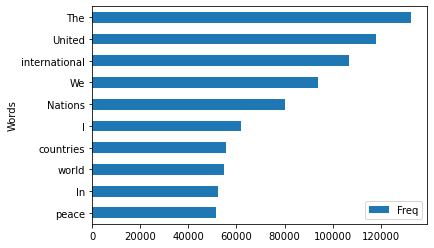

In [24]:
ax = df2.plot(kind='barh',x='Words',y='Freq')
ax.invert_yaxis()

In [25]:
df

,session,year,country,text,length,tokens,text_sw_removal
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...,19023,"[﻿It, is, indeed, a, pleasure, for, me, and, t...","[﻿It, indeed, pleasure, members, delegation, e..."
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ...",17396,"[﻿, May, I, begin, by, congratulating, you., S...","[﻿, May, I, begin, congratulating, you., Sir,,..."
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ...",30780,"[﻿, Mr., President,, it, is, a, particular, pl...","[﻿, Mr., President,, particular, pleasure, me,..."
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...,17249,"[﻿, During, the, debate, at, the, fortieth, se...","[﻿, During, debate, fortieth, session, General..."
4,44,1989,ZWE,﻿I should like at the outset to express my del...,27779,"[﻿I, should, like, at, the, outset, to, expres...","[﻿I, like, outset, express, delegation's, sati..."
...,...,...,...,...,...,...,...
7502,56,2001,KAZ,﻿This session\nthat is taking place under extr...,9510,"[﻿This, session, that, is, taking, place, unde...","[﻿This, session, taking, place, extraordinary,..."
7503,56,2001,LBR,﻿I am honoured to\nparticipate in this histori...,15573,"[﻿I, am, honoured, to, participate, in, this, ...","[﻿I, honoured, participate, historic, session,..."
7504,56,2001,BDI,﻿It\nis for me a signal honour to take the flo...,16767,"[﻿It, is, for, me, a, signal, honour, to, take...","[﻿It, signal, honour, take, floor, today, Asse..."
7505,56,2001,HUN,"﻿First, may I congratulate Mr. Han Seung-soo o...",11593,"[﻿First,, may, I, congratulate, Mr., Han, Seun...","[﻿First,, may, I, congratulate, Mr., Han, Seun..."


In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [27]:
text = df.query("year=='2015' and country=='USA'")['text'].values[0]
text1 = df.query("year=='2015' and country=='IND'")['text'].values[0]

(-0.5, 399.5, 199.5, -0.5)

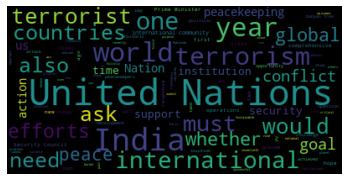

In [28]:
wc = WordCloud(max_words=100,stopwords=sw)
wc1 = WordCloud(max_words=100,stopwords=sw)
wc.generate(text)
wc1.generate(text1)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.imshow(wc1,interpolation='bilinear')
plt.axis('off')

In [29]:
idf_df=pd.DataFrame.from_dict(counter,orient='index', columns=['df'])

In [30]:
idf_df.shape

(167092, 1)

In [31]:
idf_df = idf_df.query('df >= 2')

In [32]:
idf_df.shape

(86096, 1)

In [33]:
import numpy as np
idf_df['idf']= np.log(len(df)/idf_df['df'])+0.1

In [34]:
idf_df

,df,idf
﻿It,237,3.555531
indeed,3404,0.890885
pleasure,2041,1.402396
members,7262,0.133181
delegation,11362,-0.314439
...,...,...
zero”,2,8.330444
Lesson,3,7.924979
"Bollier,",2,8.330444
"Megrahi,",2,8.330444


In [35]:
df3 = pd.DataFrame.from_dict(counter, orient='index',columns=['Freq'])

In [36]:
df3

,Freq
﻿It,237
indeed,3404
pleasure,2041
members,7262
delegation,11362
...,...
strategic:,1
anthrax-related,1
preaching”,1
XVI:125),1


In [37]:
df3['tfidf'] = df3['Freq'] * idf_df['idf']

In [38]:
df3

,Freq,tfidf
﻿It,237,842.660860
indeed,3404,3032.571546
pleasure,2041,2862.290307
members,7262,967.157848
delegation,11362,-3572.650641
...,...,...
strategic:,1,NaN
anthrax-related,1,NaN
preaching”,1,NaN
XVI:125),1,NaN


# KEYWORD IN CONTEXT OR KWIC

In [54]:
from textacy.extract.kwic import keyword_in_context

In [57]:
keyword = 'climate'
l.extend(keyword_in_context(text, keyword, ignore_case=True, window_width=35))

In [58]:
l

[(' to the ravages of an ever-warming ',
  'climate',
  '. The same ingenuity that produced '),
 (' country can escape the ravages of ',
  'climate',
  ' change. And there is no stronger s')]

In [61]:
def ngrams(tokens, n = 2, sep=' '):
    return [sep.join(ngram) for ngram 

SyntaxError: invalid syntax (<ipython-input-61-b6e5fb495e72>, line 2)